In [4]:
using QuadGK, Polynomials, Plots

### Task 1 - Lagrange's Polynomials

- Using the <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> package, implement Legendre polynomials defined as follows:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- Draw their graphs in the interval (-1,1).- 
Verify (e.g., using the roots function from the Polynomials package) that their zeros are the abscissas of Gauss quadrature points. Perform the test  for polynomials of degrees 2 to 4
- 
Provide the connection of this fact with the fundamental theorem of Gauss quadrature (from the lecture).

In [14]:
function legendre_poly(n)
    a = Polynomial([1]) 
    if n == 0
        return a 
    end 
    p1 = Polynomial([0,1])
    b = Polynomial([0,1])
    if n == 1
        return b
    end
    
    for i in 2:n
        tmp = (2*i-1)/i * p1 * b - (i-1)/i * a
        a = b 
        b = tmp
    end

    return b
end

legendre_poly (generic function with 1 method)

In [15]:
p0 = legendre_poly(0)
p1 = legendre_poly(1)
p2 = legendre_poly(2)
p3 = legendre_poly(3)
p4 = legendre_poly(4);

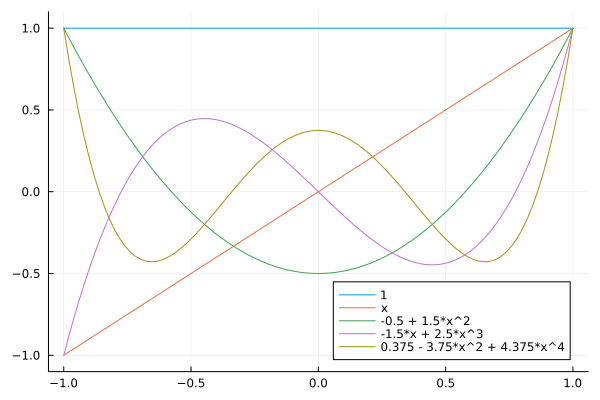

In [16]:
xs = -1:0.01:1

plot(p0,extrema(xs)...)
plot!(p1,extrema(xs)...)
plot!(p2,extrema(xs)...)
plot!(p3,extrema(xs)...)
plot!(p4,
    extrema(xs)...,
    ylim = (-1.1,1.1))

In [19]:
(abscissa, coeffs) = gauss(Float64,2)
println("zeros: ", sort(roots(p2)))
println("abscissa: ", sort(abscissa))


(abscissa, coeffs) = gauss(Float64,3)
println("zeros: ", sort(roots(p3)))
println("abscissa: ", sort(abscissa))


(abscissa, coeffs) = gauss(Float64,4)
println("zeros: ", sort(roots(p4)))
println("abscissa: ", sort(abscissa))

zeros: [-0.5773502691896258, 0.5773502691896256]
abscissa: [-0.5773502691896258, 0.5773502691896258]
zeros: [-0.7745966692414834, 0.0, 0.7745966692414835]
abscissa: [-0.7745966692414834, 0.0, 0.7745966692414834]
zeros: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
abscissa: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


The abscissas $x_{i}$  of an n-point Gauss quadrature with weighting function $\omega(x)$ in $[a,b]$ are the zeros of the orthogonal polynomial $\phi_{n}(x)$ for the same interval and same weighting function $\omega(x)$.

### Task 2 - Calculating integral using Gauss method

- Write a function that, for a given number of Gauss points $k$ and a function $f$, calculates $\int_{-1}^{1} f dx$ using the function:
```julia
gauss(k)
```
and sum 
```julia
sum(a .* f.(xp)) 
```

- Test the function for polynomials of increasing degrees.- 
Check when it stops being accurate.- 
Provide the connection with the theorem regarding the degree of accuracy of Gauss quadrature.

In [21]:
function integrate_gauss(k,f)
    (abscissa, coeffs) = gauss(Float64,k)
    return sum(coeffs .* f.(abscissa))
end    

integrate_gauss (generic function with 1 method)

In [31]:
polynomials = [[if j != i  0 else i end for i in 1:j] for j in 1:20]

for poly in polynomials
    p = Polynomial(poly)
    println(p, "  calculated: ", integrate_gauss(4,p), "  expected: ", 1^length(poly) - ((-1)^length(poly)))
end

1  calculated: 2.0  expected: 2
2*x  calculated: -1.1102230246251565e-16  expected: 0
3*x^2  calculated: 2.0000000000000004  expected: 2
4*x^3  calculated: 0.0  expected: 0
5*x^4  calculated: 2.000000000000001  expected: 2
6*x^5  calculated: 0.0  expected: 0
7*x^6  calculated: 2.000000000000001  expected: 2
8*x^7  calculated: 0.0  expected: 0
9*x^8  calculated: 1.8955102040816336  expected: 2
10*x^9  calculated: 0.0  expected: 0
11*x^10  calculated: 1.7163848396501462  expected: 2
12*x^11  calculated: 0.0  expected: 0
13*x^12  calculated: 1.5039933361099547  expected: 2
14*x^13  calculated: 0.0  expected: 0
15*x^14  calculated: 1.286849526982805  expected: 2
16*x^15  calculated: 0.0  expected: 0
17*x^16  calculated: 1.0815029248017407  expected: 2
18*x^17  calculated: 0.0  expected: 0
19*x^18  calculated: 0.8963465339393335  expected: 2
20*x^19  calculated: 0.0  expected: 0


The function stops to be accurate at a polynomial degree equal to 8. This follows from the theorem on the degree of accuracy of Gauss quadrature - it is accurate for polynomials of degree at most $2n - 1$. Therefore, for a quadrature of order 4, accuracy ends at a polynomial of degree 7.

### Task 3 - Calculating integral using Gauss method for arbitrary interval $[a,b]$

In [6]:
function integrate_gauss_interval(k,f,a,b)
    (x, coeffs) = gauss(Float64,k)
    z = (b-a)/2 *x .+ (b+a)/2
    return (b-a)/2 * sum(f.(z) .* coeffs)
end

integrate_gauss_interval (generic function with 1 method)

In [9]:
println("expected value: 148,05")
for i in 1:7
    println(i," : ", integrate_gauss_interval(i,x -> exp(x), -1,5))
end

expected value: 148,05
1 : 44.3343365935839
2 : 129.21585726082577
3 : 146.70004393528694
4 : 147.99310214080433
5 : 148.04400773563594
6 : 148.04525838293745
7 : 148.04527940209957


In [10]:
println("expected value: 1")
for i in 1:7
    println(i," : ", integrate_gauss_interval(i,x -> cos(x), 0, pi/2))
end

expected value: 1
1 : 1.1107207345395915
2 : 0.9984726134041145
3 : 1.0000081215554983
4 : 0.9999999771971152
5 : 1.0000000000395648
6 : 0.9999999999999533
7 : 1.0000000000000002


### Task 4 - QuadGK

The main function of the QuadGK package is the adaptive function <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a>, which uses Gauss-Kronroda quadrature for integration.

- use the quadgk function to compute the integral for a sample polynomial,
- The function also has the capability to compute integrals to infinity.

Calculate the integral from negative to positive infinity of the standard Gaussian normal distribution.
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [13]:
poly = Polynomial([1,2,3,4,5,6,7,8,9])
value, error = quadgk(poly, 2.5, 4)

(343167.837890625, 0.0)

In [14]:
normal_distribution = x -> 1/sqrt(2*pi) * exp(-x^2 / 2)
value, error = quadgk(normal_distribution, -Inf,Inf)

(1.0000000000032583, 1.4395584886006938e-8)

### Task 5 - Integrate via rectangle/trapezoidal/Simpson method

Define your own integrating function in  given interval $(a,b)$ using rectangle, trapezoidal and Simpson method. For constant interval increase number of used points. Draw plots of the error function in relation to the result obtained analytically, depending on the $h=\frac{b-a}{n}$.

1. exponential
2. trigonometric

In [17]:
function rectangle(f,a,b,n)
    result = 0 
    h = (b-a)/n 

    for i in 1:n
        result += f(a + (i-1)*h + h/2) * h
    end
    return result
end

rectangle (generic function with 1 method)

In [18]:
function trapezoidal(f,a,b,n)
    result = 0 
    h = (b-a)/n 

    for i in 1:n
        result += (f(a + (i-1)*h) + f(a + (i)*h))*h/2
    end
    return result
end

trapezoidal (generic function with 1 method)

In [20]:
function simpson(f,a,b,n)
    result  = 0
    st = 0
    h = (b-a)/n

    for i in 1:n
        x = a + i * h
        st += f(x - h / 2)
        if i < n 
            result += f(x)
        end
    end

    return h / 6 * (f(a) + f(b) + 2 * result + 4 * st)
end

simpson (generic function with 1 method)

In [39]:
function test(f,a,b,expected)
    h = Vector{Float64}()
    rectangle_error = Vector{Float64}()
    trapezoidal_error = Vector{Float64}()
    simpson_error = Vector{Float64}();

    for n in 10:100
        append!(h,(b-a)/n)
        append!(rectangle_error,abs(expected-rectangle(f,a,b,n)))
        append!(trapezoidal_error,abs(expected-trapezoidal(f,a,b,n)))
        append!(simpson_error,abs(expected-simpson(f,a,b,n)))
    end    

    plot(
        h,
        [rectangle_error, trapezoidal_error, simpson_error],
        label=["rectangle method" "trapezoidal method" "simpson method"],
        color = ["red" "blue" "green"],
        xlabel="h",
        ylabel="error",
        layout=3
    )
end

test (generic function with 1 method)

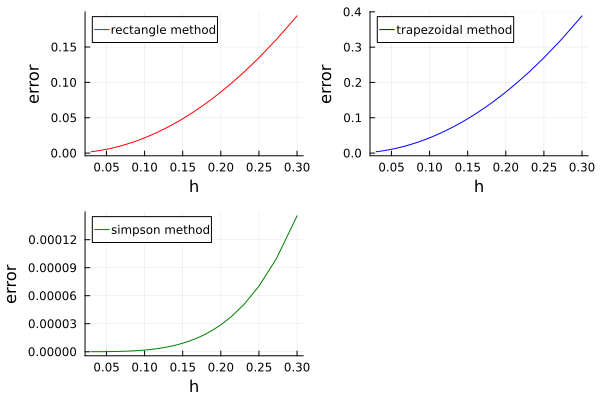

In [40]:
test(x -> exp(x),1,4,51.8798682046852)

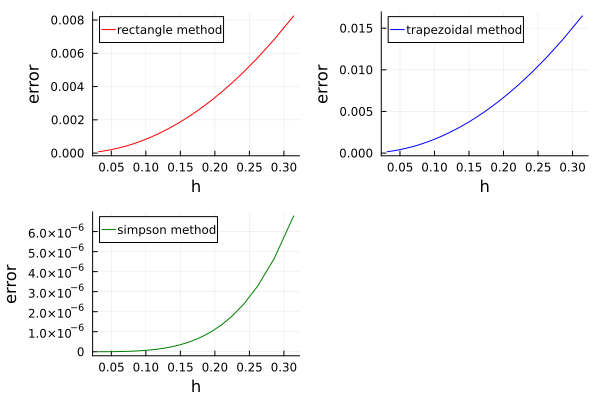

In [41]:
test(x -> sin(x),0,pi,2)